In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Set variabel
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
ec = ctrl.Antecedent(np.arange(0, 2001, 1), 'ec')
ph = ctrl.Antecedent(np.arange(0, 14, 1), 'pH')
qualities = []
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="centroid"))# centroid
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="bisector"))# bisector
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="mom"))# mom
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="som"))# som
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="lom"))# lom

In [3]:
# Set range
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['intermedium'] = fuzz.trimf(temperature.universe, [0, 20, 30])
temperature['high'] = fuzz.trapmf(temperature.universe, [20, 30, 40, 40])

ec['low'] = fuzz.trimf(ec.universe, [0, 0, 400])
ec['intermedium'] = fuzz.trimf(ec.universe, [0, 400, 1000])
ec['high'] = fuzz.trapmf(ec.universe, [400, 1000, 2000, 2000])

ph['asam'] = fuzz.trimf(ph.universe, [0, 0, 6.5])
ph['netral'] = fuzz.trimf(ph.universe, [0, 6.5, 8.5])
ph['basa'] = fuzz.trapmf(ph.universe, [7, 8.5, 14, 14])

In [4]:
# Set range output
for quality in qualities:
    quality['fair'] = fuzz.trimf(quality.universe, [0, 0, 50])
    quality['good'] = fuzz.trimf(quality.universe, [0, 50, 100])
    quality['excellent'] = fuzz.trapmf(quality.universe, [50, 100, 100, 100])

D:\Anaconda3\envs\py310-tf\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


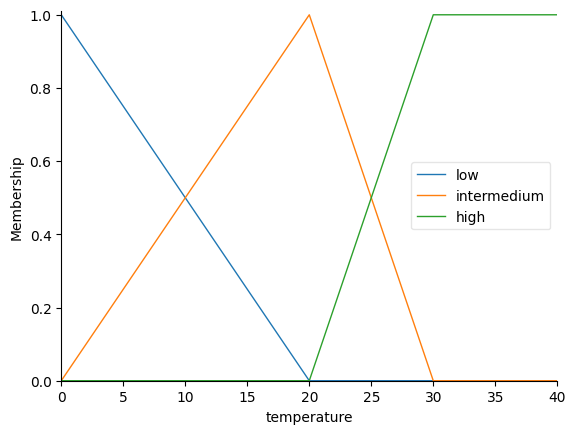

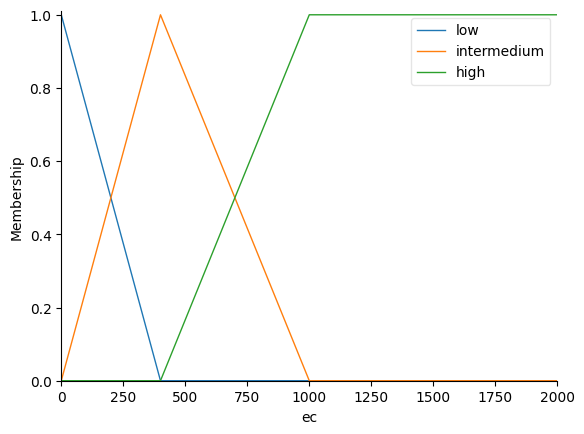

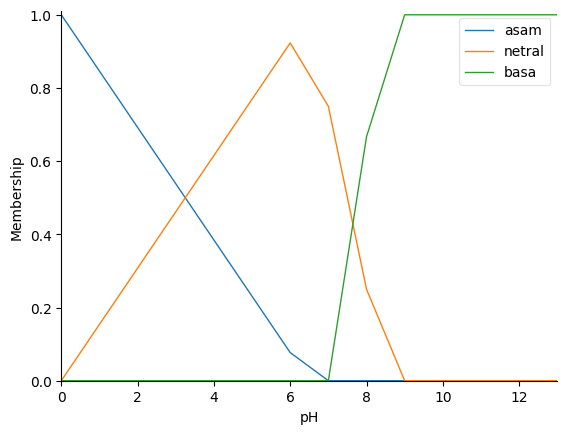

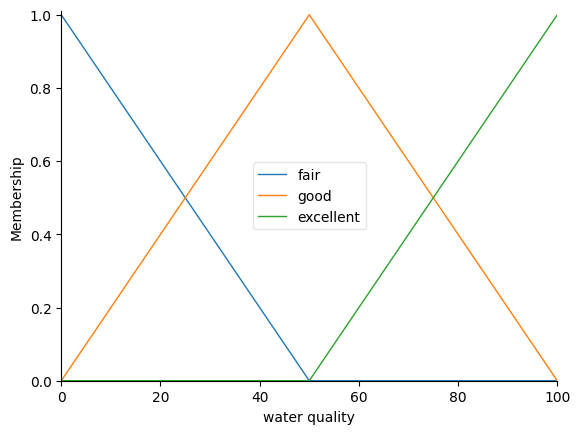

In [5]:
# View Graph
temperature.view()
ec.view()
ph.view()
q = qualities[0]
q.view()

In [6]:
rule1 = ctrl.Rule(temperature['low'] & ec['low'] & ph['asam'], qualities[0]['fair'])
rule2 = ctrl.Rule(temperature['intermedium'] & ec['intermedium'] & ph['netral'], qualities[0]['good'])
rule3 = ctrl.Rule(temperature['high'] & ec['high'] & ph['basa'], qualities[0]['excellent'])

In [7]:
# Create a control system
water_quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [8]:
# Simulation
water_quality_sim = ctrl.ControlSystemSimulation(water_quality_ctrl)
water_quality_sim.input['temperature'] = 25
water_quality_sim.input['ec'] = 800
water_quality_sim.input['pH'] = 7.5

In [9]:
# output
water_quality_sim.compute()
print("Water Quality (Centroid):", water_quality_sim.output['water quality'])

Water Quality (Centroid): 54.04040404040411


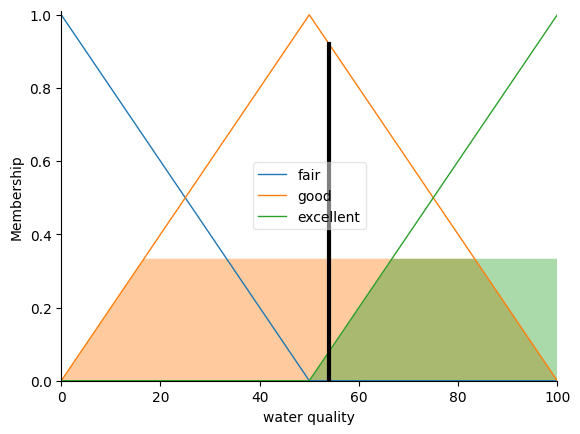

In [10]:
qualities[0].view(sim=water_quality_sim)